In [1]:
import numpy as np
import astropy.units 
import astropy.time
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt
from astropy.table import Column

In [15]:
hdul = fits.open('velac_ari_gaia1d.fits')
hdul = hdul[1].data
t = Table(hdul)

In [16]:
plx = t['parallax']
plx_error = t['parallax_error']

plx_over_error = plx / plx_error

In [17]:
valid_plx = (plx > 0) & (plx_over_error > 5)

In [21]:
t_cleaned = t[valid_plx]

In [23]:
iso = np.genfromtxt(
    "cleaned_isodata.txt",
    comments= '#',
    names=True
)

In [25]:
iso_cols = [
    "Zini", "MH", "logAge", "Mini", "int_IMF", "Mass", "logL", "logTe", "logg", "label",
    "McoreTP", "C_O", "period0", "period1", "period2", "period3", "period4", "pmode",
    "Mloss", "tau1m", "X", "Y", "Xc", "Xn", "Xo", "Cexcess", "Z", "mbolmag", "Gmag", 
    "G_BPmag", "G_RPmag"
]

iso = np.genfromtxt(
    "cleaned_isodata.txt",
    comments= '#',
    names=iso_cols
)

Teff_iso = 10**iso['logTe']
G_iso  = iso['Gmag']
ages_iso = iso['logAge']
mass_iso = iso['Mini']

In [27]:
abs_mag = t_cleaned['abs_gmag']
plx = t_cleaned['parallax']
teff = t_cleaned['teff_gspphot']
Ag = t_cleaned['ag_gspphot']
plx_error = t_cleaned['parallax_error']
ruwe = t_cleaned['ruwe']
mg_error = (2.172 / plx) * plx_error

In [29]:
dereddened_gmag = abs_mag - Ag

In [31]:
plx_mask = ((plx + plx_error > 1.0) & (plx - plx_error < 1.25))

In [33]:
age_iso = [6., 7.47712]

In [35]:
plx_lower, plx_upper = 1.0, 1.25

under = plx < plx_lower
over  = plx > plx_upper

# Compute the sigma deviation **only when it's outside**
sigma_dev = np.zeros_like(plx)

# below the lower bound
sigma_dev[under] = (plx_lower - plx[under]) / plx_error[under]

# above the upper bound
sigma_dev[over] = (plx[over] - plx_upper) / plx_error[over]

In [37]:
mask_1sigma = (sigma_dev > 0) & (sigma_dev <= 1)
mask_2sigma = (sigma_dev > 1) & (sigma_dev <= 2)
mask_3sigma = (sigma_dev > 2) & (sigma_dev <= 3)
mask_beyond = sigma_dev > 3

In [39]:
targetAge = 1e7
logAges  = np.unique(ages_iso)
targetLogA = np.log10(targetAge)
la0    = logAges[np.argmin(np.abs(logAges - targetLogA))]
sel0    = ages_iso == la0

# get the *current* mass at 10 Myr
M0   = iso['Mass'][sel0]
Teff0 = Teff_iso[sel0]
G0   = G_iso[sel0]

# sort by Teff
order0 = np.argsort(Teff0)
Teff0 = Teff0[order0]
G0   = G0[order0]
M0   = M0[order0]

# choose which masses to label
targets = [2, 5, 10, 15]  
target_logAge = 6.

# Subset the isochrone for the desired age
iso_mask = (ages_iso == target_logAge)
Teff_age = Teff_iso[iso_mask]
G_age = G_iso[iso_mask]
M_age = mass_iso[iso_mask]

In [41]:
temp_mask = teff > 7500 
ruwe_mask = (ruwe < 1.4) & (teff < 25000)
mag_mask = (((teff > 7500) & (teff < 7750) & (dereddened_gmag - mg_error < 2.70)) |
            ((teff > 7750) & (teff < 8000) & (dereddened_gmag - mg_error < 2.55)) |
            ((teff > 8000) & (teff < 8500) & (dereddened_gmag - mg_error < 2.40)) |
            ((teff > 8500) & (teff < 8750) & (dereddened_gmag - mg_error < 2.20)) | 
            ((teff > 8750) & (teff < 9000) & (dereddened_gmag - mg_error < 2.00)) |
            ((teff > 9000) & (teff < 9500) & (dereddened_gmag - mg_error < 1.90)) |
            ((teff > 9500) & (teff < 10000) & (dereddened_gmag - mg_error < 1.65)) | 
            ((teff > 10000) & (teff < 14000) & (dereddened_gmag - mg_error < 1.5)) | 
            ((teff > 14000) & (teff < 20000) & (dereddened_gmag - mg_error < 0)))

mask_above_1iso = temp_mask & plx_mask & (dereddened_gmag - mg_error < -0.9) 

mask_above_5iso = temp_mask & plx_mask & (dereddened_gmag < 1.0) 

mask_above_20iso = temp_mask & plx_mask & (dereddened_gmag < 2.4) 

mask_above_30iso = temp_mask & plx_mask & mag_mask 

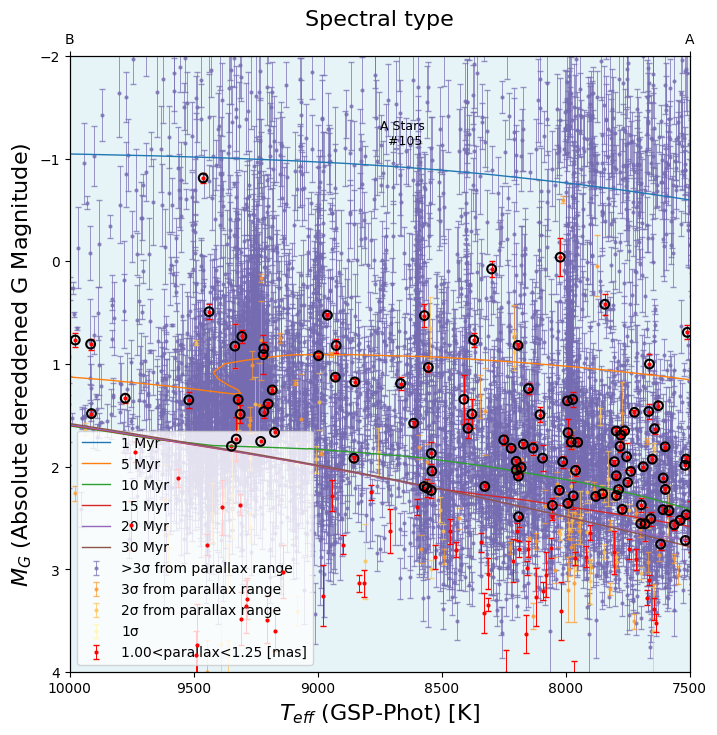

In [47]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.fill_betweenx(
    y=[-12, 10],  
    x1=30000,     
    x2=40000,     
    facecolor='purple',
    alpha=0.3
)

ax.fill_betweenx(
    y=[-12, 10],  
    x1=10000,     
    x2=30000,     
    facecolor='pink',
    alpha=0.5
)

ax.fill_betweenx(
    y=[-12, 10],  
    x1=7500,     
    x2=10000,     
    facecolor='lightblue',
    alpha=0.3
)

ax.fill_betweenx(
    y=[-12, 10],  
    x1=6000,     
    x2=7500,     
    facecolor='cyan',
    alpha=0.3
)

ax.fill_betweenx(
    y=[-12, 10],  
    x1=5000,     
    x2=6000,     
    facecolor='green',
    alpha=0.3
)

ax.fill_betweenx(
    y=[-12, 10],  
    x1=3500,     
    x2=5000,     
    facecolor='yellow',
    alpha=0.3
)

ax.fill_betweenx(
    y=[-12, 10],  
    x1=2000,     
    x2=3500,     
    facecolor='orange',
    alpha=0.3
)

# Plotting Isochrone
for i, la in enumerate(np.unique(ages_iso)):
    #For each age la, sel = ages_iso == la filters the data to just that isochrone.
    sel  = ages_iso == la
    order = np.argsort(mass_iso[sel])
    ax.plot(
        Teff_iso[sel][order],
        G_iso[sel][order],
        lw=1,
        label=f"{10**la/1e6:.0f} Myr", zorder=6
    )

for target in targets:
    # Find index of closest mass on the selected isochrone
    idx = np.argmin(np.abs(M_age - target))

    if (Teff_age[idx] < 10000) & (Teff_age[idx] > 7500):
        ax.scatter(
            Teff_age[idx], G_age[idx],
            marker='*', s=100, c='k', zorder=8
        )
    
        ax.text(
            Teff_age[idx] * 1.05, G_age[idx],
            f"{M_age[idx]:.0f} $M_\\odot$",
            fontsize=12, ha='right', va='center', zorder=9
        )

ax.set_xlim(7500, 10000) 
ax2 = ax.twiny()
ax2.set_xlim(ax.get_xlim())

spectral_temps =  [10000, 7500] #, 6000, 5000, 3500, 2000]
spectral_types = ['B', 'A'] #, 'F', 'G', 'K', 'M']

ax2.set_xticks(spectral_temps)
ax2.set_xticklabels(spectral_types, fontsize=10)
ax2.set_xlabel('Spectral type', labelpad=5, fontsize = 16)
ax2.invert_xaxis()

ax.errorbar(teff[mask_beyond], dereddened_gmag[mask_beyond], mg_error[mask_beyond],
           fmt='o', c="#756bb1", ecolor="#756bb1", elinewidth=0.7, capsize=2, label='>3σ from parallax range', markersize=2, zorder=1, alpha=0.7)

ax.errorbar(teff[mask_3sigma], dereddened_gmag[mask_3sigma], mg_error[mask_3sigma], 
           fmt='o', c="#fe9929", ecolor="#fe9929", elinewidth=0.7, capsize=2, label='3σ from parallax range', markersize=2, zorder=2, alpha=0.7)

ax.errorbar(teff[mask_2sigma], dereddened_gmag[mask_2sigma], mg_error[mask_2sigma], 
           fmt='o', c="#fec44f", ecolor="#fec44f", elinewidth=0.7, capsize=2, label='2σ from parallax range', markersize=2, zorder=3, alpha=0.7)

ax.errorbar(teff[mask_1sigma], dereddened_gmag[mask_1sigma], mg_error[mask_1sigma], 
           fmt='o', c="#fff7bc", ecolor="#fff7bc", elinewidth=0.7, capsize=2, label='1σ', markersize=2, zorder=4)

ax.errorbar(teff[plx_mask], dereddened_gmag[plx_mask], mg_error[plx_mask],
           fmt='o', c='red', ecolor='red', elinewidth=0.7, capsize=2, label=f'1.00<parallax<1.25 [mas]',
           markersize=2, zorder=5)

ax.scatter(
    teff[mask_above_1iso | mask_above_30iso],
    dereddened_gmag[mask_above_1iso | mask_above_30iso],
    c="none",
    s=40,
    edgecolors="black",
    linewidths=1.5,
    zorder=7
)

# ax.text(36500, -10.5, f"O Stars\n  #{np.sum((teff > 30000) & plx_mask)}",
#         va='center', ha='left', fontsize=9, color='black')


# ax.text(21000, -5.5, f"B Stars\n  #{len(teff[(teff < 30000) & (teff > 10000) & plx_mask & (mask_above_1iso | mask_above_30iso)])}",
#         va='center', ha='left', fontsize=9, color='black')

ax.text(8750, -1.25, f"A Stars\n  #{len(teff[(teff < 10000) & (teff > 7500)& plx_mask & (mask_above_1iso | mask_above_30iso)])}",
        va='center', ha='left', fontsize=9, color='black')

ax.set_xlabel("$T_{eff}$ (GSP-Phot) [K]", fontsize = 16)
ax.set_ylabel("$M_G$ (Absolute dereddened G Magnitude)", fontsize = 16)
ax.tick_params(axis='both', labelsize=10)
ax.set_ylim(-2, 4)
ax.set_xlim(7500, 10000) 
ax.invert_xaxis()
ax.invert_yaxis()
ax.legend(fontsize = 10, loc = 'lower left')
plt.savefig('dereddened_hr_diagram_gaia_a.png', bbox_inches='tight')
plt.show()

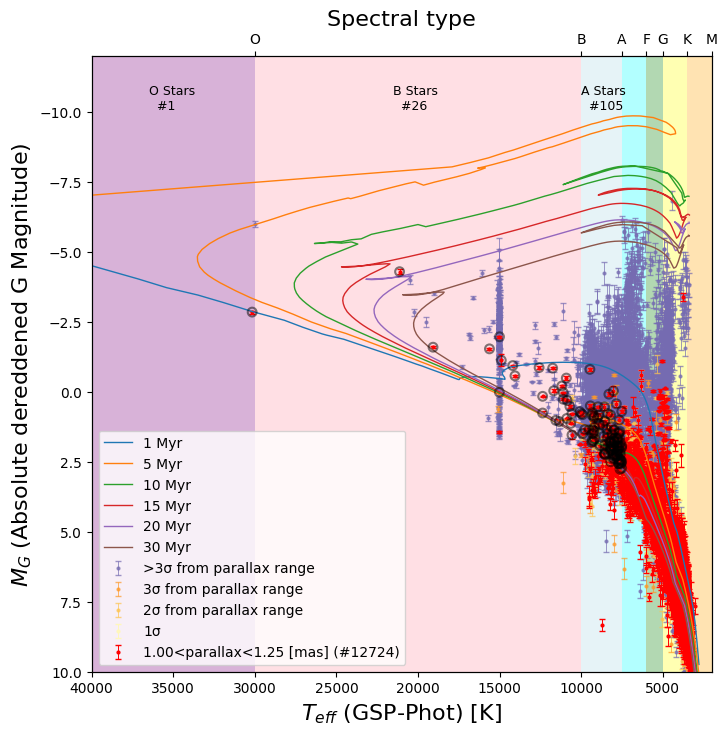

In [48]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.fill_betweenx(
    y=[-12, 10],  
    x1=30000,     
    x2=40000,     
    facecolor='purple',
    alpha=0.3
)

ax.fill_betweenx(
    y=[-12, 10],  
    x1=10000,     
    x2=30000,     
    facecolor='pink',
    alpha=0.5
)

ax.fill_betweenx(
    y=[-12, 10],  
    x1=7500,     
    x2=10000,     
    facecolor='lightblue',
    alpha=0.3
)

ax.fill_betweenx(
    y=[-12, 10],  
    x1=6000,     
    x2=7500,     
    facecolor='cyan',
    alpha=0.3
)

ax.fill_betweenx(
    y=[-12, 10],  
    x1=5000,     
    x2=6000,     
    facecolor='green',
    alpha=0.3
)

ax.fill_betweenx(
    y=[-12, 10],  
    x1=3500,     
    x2=5000,     
    facecolor='yellow',
    alpha=0.3
)

ax.fill_betweenx(
    y=[-12, 10],  
    x1=2000,     
    x2=3500,     
    facecolor='orange',
    alpha=0.3
)

# Plotting Isochrone
for i, la in enumerate(np.unique(ages_iso)):
    #For each age la, sel = ages_iso == la filters the data to just that isochrone.
    sel  = ages_iso == la
    order = np.argsort(mass_iso[sel])
    ax.plot(
        Teff_iso[sel][order],
        G_iso[sel][order],
        lw=1,
        label=f"{10**la/1e6:.0f} Myr", zorder=6
    )

for target in targets:
    if Teff_age[idx] < 29000:
        idx = np.argmin(np.abs(M_age - target))
    
        ax.scatter(
            Teff_age[idx], G_age[idx],
            marker='*', s=100, c='k', zorder=8
        )
    
        ax.text(
            Teff_age[idx] * 1.05, G_age[idx],
            f"{M_age[idx]:.0f} $M_\\odot$",
            fontsize=12, ha='right', va='center', zorder=9
        )

ax.set_xlim(2000, 40000) 
ax2 = ax.twiny()
ax2.set_xlim(ax.get_xlim())

spectral_temps = [30000, 10000, 7500, 6000, 5000, 3500, 2000]
spectral_types = ['O', 'B', 'A', 'F', 'G', 'K', 'M']

ax2.set_xticks(spectral_temps)
ax2.set_xticklabels(spectral_types, fontsize=10)
ax2.set_xlabel('Spectral type', labelpad=5, fontsize = 16)
ax2.invert_xaxis()

ax.errorbar(teff[mask_beyond], dereddened_gmag[mask_beyond], mg_error[mask_beyond],
           fmt='o', c="#756bb1", ecolor="#756bb1", elinewidth=0.7, capsize=2, label='>3σ from parallax range', markersize=2, zorder=1, alpha=0.7)

ax.errorbar(teff[mask_3sigma], dereddened_gmag[mask_3sigma], mg_error[mask_3sigma], 
           fmt='o', c="#fe9929", ecolor="#fe9929", elinewidth=0.7, capsize=2, label='3σ from parallax range', markersize=2, zorder=2, alpha=0.7)

ax.errorbar(teff[mask_2sigma], dereddened_gmag[mask_2sigma], mg_error[mask_2sigma], 
           fmt='o', c="#fec44f", ecolor="#fec44f", elinewidth=0.7, capsize=2, label='2σ from parallax range', markersize=2, zorder=3, alpha=0.7)

ax.errorbar(teff[mask_1sigma], dereddened_gmag[mask_1sigma], mg_error[mask_1sigma], 
           fmt='o', c="#fff7bc", ecolor="#fff7bc", elinewidth=0.7, capsize=2, label='1σ', markersize=2, zorder=4)

ax.errorbar(teff[plx_mask], dereddened_gmag[plx_mask], mg_error[plx_mask],
           fmt='o', c='red', ecolor='red', elinewidth=0.7, capsize=2, label=f'1.00<parallax<1.25 [mas] (#{len(dereddened_gmag[plx_mask])})',
           markersize=2, zorder=5)

ax.scatter(
    teff[mask_above_1iso | mask_above_30iso],
    dereddened_gmag[mask_above_1iso | mask_above_30iso],
    c="none",
    s=40,
    edgecolors="black",
    linewidths=1.5,
    zorder=7,
    alpha=0.5
)


ax.text(36500, -10.5, f"O Stars\n  #{np.sum((teff > 30000) & plx_mask)}",
        va='center', ha='left', fontsize=9, color='black')


ax.text(21500, -10.5, f"B Stars\n  #{len(teff[(teff < 30000) & (teff > 10000) & plx_mask & (mask_above_1iso | mask_above_30iso)])}",
        va='center', ha='left', fontsize=9, color='black')

ax.text(10000, -10.5, f"A Stars\n  #{len(teff[(teff < 10000) & (teff > 7500)& plx_mask & (mask_above_1iso | mask_above_30iso)])}",
        va='center', ha='left', fontsize=9, color='black')

ax.set_xlabel("$T_{eff}$ (GSP-Phot) [K]", fontsize = 16)
ax.set_ylabel("$M_G$ (Absolute dereddened G Magnitude)", fontsize = 16)
ax.tick_params(axis='both', labelsize=10)
ax.set_ylim(-12, 10)
ax.set_xlim(2000, 40000) 
ax.invert_xaxis()
ax.invert_yaxis()
ax.legend(fontsize = 10, loc = 'lower left')
plt.savefig('dereddened_hr_diagram_gaia.png', bbox_inches='tight')
plt.show()

In [263]:
selected_indices = np.where(mask_above_1iso | mask_above_30iso)[0]

selected_data = t[selected_indices].copy()

selected_data['above_1iso'] = mask_above_1iso[selected_indices]
selected_data['above_30iso'] = mask_above_30iso[selected_indices]

selected_data.write("OBA_stars_gaia.fits", format="fits", overwrite=True)

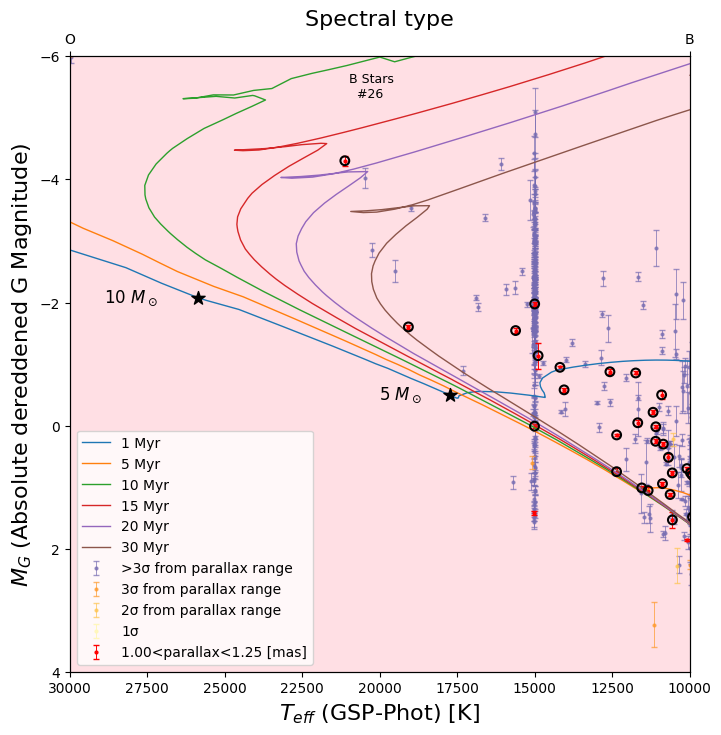

In [51]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.fill_betweenx(
    y=[-12, 10],  
    x1=30000,     
    x2=40000,     
    facecolor='purple',
    alpha=0.3
)

ax.fill_betweenx(
    y=[-12, 10],  
    x1=10000,     
    x2=30000,     
    facecolor='pink',
    alpha=0.5
)

ax.fill_betweenx(
    y=[-12, 10],  
    x1=7500,     
    x2=10000,     
    facecolor='lightblue',
    alpha=0.3
)

ax.fill_betweenx(
    y=[-12, 10],  
    x1=6000,     
    x2=7500,     
    facecolor='cyan',
    alpha=0.3
)

ax.fill_betweenx(
    y=[-12, 10],  
    x1=5000,     
    x2=6000,     
    facecolor='green',
    alpha=0.3
)

ax.fill_betweenx(
    y=[-12, 10],  
    x1=3500,     
    x2=5000,     
    facecolor='yellow',
    alpha=0.3
)

ax.fill_betweenx(
    y=[-12, 10],  
    x1=2000,     
    x2=3500,     
    facecolor='orange',
    alpha=0.3
)

# Plotting Isochrone
for i, la in enumerate(np.unique(ages_iso)):
    #For each age la, sel = ages_iso == la filters the data to just that isochrone.
    sel  = ages_iso == la
    order = np.argsort(mass_iso[sel])
    ax.plot(
        Teff_iso[sel][order],
        G_iso[sel][order],
        lw=1,
        label=f"{10**la/1e6:.0f} Myr", zorder=6
    )

for target in targets:
    # Find index of closest mass on the selected isochrone
    idx = np.argmin(np.abs(M_age - target))

    if (Teff_age[idx] < 30000) & (Teff_age[idx] > 10000):
        ax.scatter(
            Teff_age[idx], G_age[idx],
            marker='*', s=100, c='k', zorder=8
        )
    
        ax.text(
            Teff_age[idx] * 1.05, G_age[idx],
            f"{M_age[idx]:.0f} $M_\\odot$",
            fontsize=12, ha='right', va='center', zorder=9
        )

ax.set_xlim(10000, 30000) 
ax2 = ax.twiny()
ax2.set_xlim(ax.get_xlim())

spectral_temps = [30000, 10000] #, 7500, 6000, 5000, 3500, 2000]
spectral_types = ['O', 'B'] #, 'A', 'F', 'G', 'K', 'M']

ax2.set_xticks(spectral_temps)
ax2.set_xticklabels(spectral_types, fontsize=10)
ax2.set_xlabel('Spectral type', labelpad=5, fontsize = 16)
ax2.invert_xaxis()

ax.errorbar(teff[mask_beyond], dereddened_gmag[mask_beyond], mg_error[mask_beyond],
           fmt='o', c="#756bb1", ecolor="#756bb1", elinewidth=0.7, capsize=2, label='>3σ from parallax range', markersize=2, zorder=1, alpha=0.7)

ax.errorbar(teff[mask_3sigma], dereddened_gmag[mask_3sigma], mg_error[mask_3sigma], 
           fmt='o', c="#fe9929", ecolor="#fe9929", elinewidth=0.7, capsize=2, label='3σ from parallax range', markersize=2, zorder=2, alpha=0.7)

ax.errorbar(teff[mask_2sigma], dereddened_gmag[mask_2sigma], mg_error[mask_2sigma], 
           fmt='o', c="#fec44f", ecolor="#fec44f", elinewidth=0.7, capsize=2, label='2σ from parallax range', markersize=2, zorder=3, alpha=0.7)

ax.errorbar(teff[mask_1sigma], dereddened_gmag[mask_1sigma], mg_error[mask_1sigma], 
           fmt='o', c="#fff7bc", ecolor="#fff7bc", elinewidth=0.7, capsize=2, label='1σ', markersize=2, zorder=4)

ax.errorbar(teff[plx_mask], dereddened_gmag[plx_mask], mg_error[plx_mask],
           fmt='o', c='red', ecolor='red', elinewidth=0.7, capsize=2, label=f'1.00<parallax<1.25 [mas]',
           markersize=2, zorder=5)

ax.scatter(
    teff[mask_above_1iso | mask_above_30iso],
    dereddened_gmag[mask_above_1iso | mask_above_30iso],
    c="none",
    s=40,
    edgecolors="black",
    linewidths=1.5,
    zorder=7
)


# ax.text(36500, -10.5, f"O Stars\n  #{np.sum((teff > 30000) & plx_mask)}",
#         va='center', ha='left', fontsize=9, color='black')


ax.text(21000, -5.5, f"B Stars\n  #{len(teff[(teff < 30000) & (teff > 10000) & plx_mask & (mask_above_1iso | mask_above_30iso)])}",
        va='center', ha='left', fontsize=9, color='black')

# ax.text(9500, -8.5, f"A Stars\n  #{len(teff[(teff < 10000) & (teff > 7500)& plx_mask & (mask_above_1iso | mask_above_30iso)])}",
#         va='center', ha='left', fontsize=9, color='black')

ax.set_xlabel("$T_{eff}$ (GSP-Phot) [K]", fontsize = 16)
ax.set_ylabel("$M_G$ (Absolute dereddened G Magnitude)", fontsize = 16)
ax.tick_params(axis='both', labelsize=10)
ax.set_ylim(-6, 4)
ax.set_xlim(10000, 30000) 
ax.invert_xaxis()
ax.invert_yaxis()
ax.legend(fontsize = 10, loc = 'lower left')
plt.savefig('dereddened_hr_diagram_gaia_b.png', bbox_inches='tight')
plt.show()